# Load data set to pandas for EDA
- Level I

## import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## setting flags

In [2]:
pd.options.display.max_columns=500
pd.options.display.max_rows=200
# to set dataframes to show more cols & rows

## setting path

In [3]:
# from google.colab import files
# uploaded = files.upload()

# import os
# os.chdir('content/drive/MyDrive/PG-DBDA C-DAC Mumbai KH/Final Project/US accident/Datasets')
# os.getcwd()
# US_Accidents_March23.csv

import os
os.chdir(r'E:\Datasets\US Accidents (2016 - 2023)')
os.getcwd()

'E:\\Datasets\\US Accidents (2016 - 2023)'

## loading dataset

In [4]:
df1 = pd.read_csv(r'US_Accidents_March23.csv')

In [5]:
df1.shape

(7728394, 46)

In [6]:
df1.head(2)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

## converting data types of columns

### converting time cols which have"string" type to "datetime" type

In [12]:
df1['Start_Time'] = pd.to_datetime(df1['Start_Time'], format='mixed')
df1['End_Time'] = pd.to_datetime(df1['End_Time'], format='mixed')
df1['Weather_Timestamp'] = pd.to_datetime(df1['Weather_Timestamp'], format='mixed')

### converting numeric cols which have"string" type to "int" type

In [13]:
df1['Zipcode'] = df1['Zipcode'].str.slice(0, 5).astype('int64', errors='ignore')

## Generating columns

### creating new columns out of 'Start_Time' column

In [14]:
df1['Year'] = pd.to_datetime(df1['Start_Time'], format='mixed').dt.strftime("%Y").astype('int64')
df1['MonthC'] = pd.to_datetime(df1['Start_Time'], format='mixed').dt.strftime("%b").astype('category')
df1['Month'] = pd.to_datetime(df1['Start_Time'], format='mixed').dt.strftime("%m").astype('int64')

In [15]:
df1['Day'] = pd.to_datetime(df1['Start_Time'], format='mixed').dt.strftime("%d").astype('int64')
df1['WeekdayC'] = pd.to_datetime(df1['Start_Time'], format='mixed').dt.strftime("%a").astype('category')
df1['Weekday'] = pd.to_datetime(df1['Start_Time'], format='mixed').dt.strftime("%w").astype('int64')

In [16]:
df1['Hour'] = pd.to_datetime(df1['Start_Time'], format='mixed').dt.strftime("%H").astype('int64')
df1['Time Duration (min)'] = (round((df1['End_Time'] - df1['Start_Time'])/np.timedelta64(1,'m'),3)).astype('float64')

## dropping 'Start_Time' & 'End_Time' column

In [17]:
df1.drop(['Start_Time', 'End_Time'], axis=1, inplace=True)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 52 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Lat              float64       
 4   Start_Lng              float64       
 5   End_Lat                float64       
 6   End_Lng                float64       
 7   Distance(mi)           float64       
 8   Description            object        
 9   Street                 object        
 10  City                   object        
 11  County                 object        
 12  State                  object        
 13  Zipcode                object        
 14  Country                object        
 15  Timezone               object        
 16  Airport_Code           object        
 17  Weather_Timestamp      datetime64[ns]
 18  Temperature(F)        

## Insights from EDA on Raw (Level I) data set

### top 10 cities for accident count

In [19]:
# create a dataframe of city and their corresponding accident cases
city_df = pd.DataFrame(df1['City'].value_counts()).reset_index().rename(columns={'count':'Cases'})
city_df = pd.DataFrame(df1['City'].value_counts())
city_df.columns = ['Cases']

In [20]:
top_10_cities = pd.DataFrame(city_df.head(10))
print(top_10_cities)

              Cases
City               
Miami        186917
Houston      169609
Los Angeles  156491
Charlotte    138652
Dallas       130939
Orlando      109733
Austin        97359
Raleigh       86079
Nashville     72930
Baton Rouge   71588


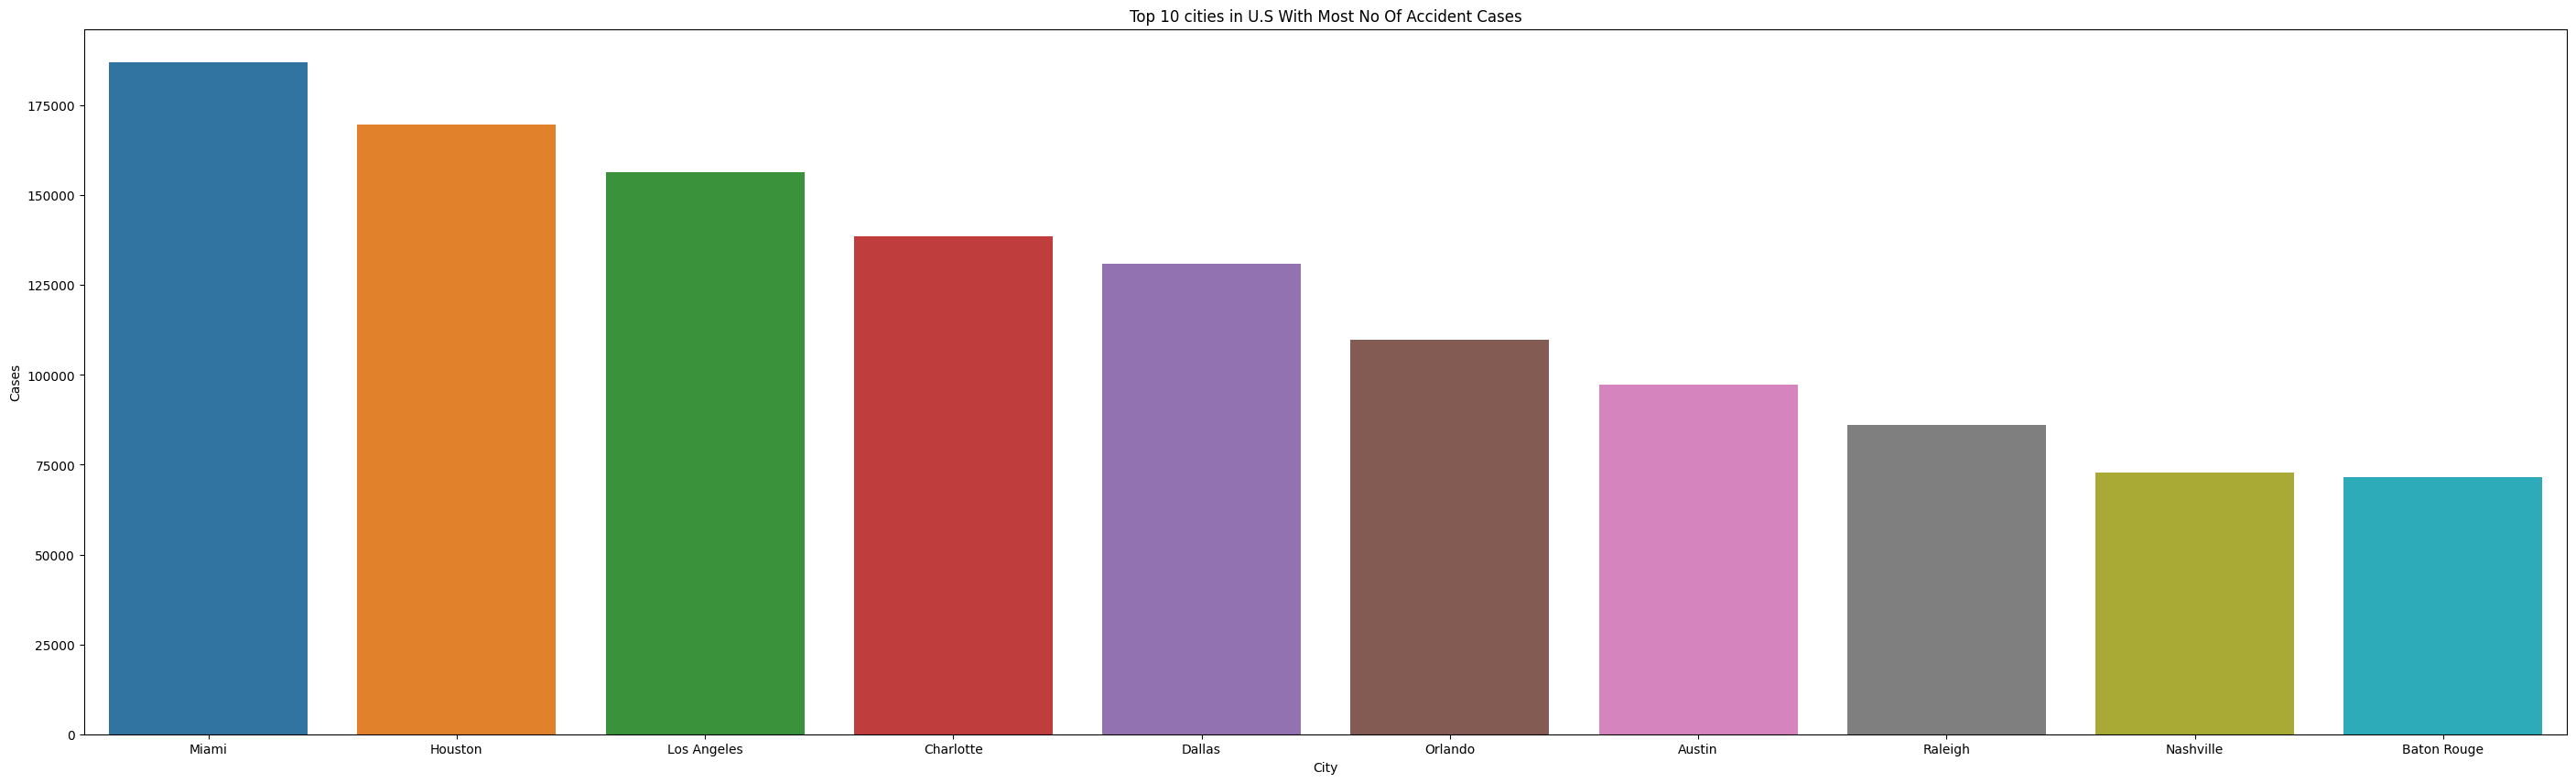

In [21]:
plt.figure(figsize=(35,10))
sns.barplot(x=top_10_cities.index, y=top_10_cities['Cases'])
plt.title('Top 10 cities in U.S With Most No Of Accident Cases')
plt.savefig('Top_10_cities_with_accidents_Distribution.png', bbox_inches='tight', dpi=600)
plt.show()

### yearly average & daily average accidents
- for top most city (Miami)
    - In past 8 years (2016-2023) yearly 23364 road accidents (average) happened in Miami.
    - In Miami averagely in every 12 hours 64 accidents occurred.

In [22]:
hightest_cases = city_df.Cases[0]
print(round(int(city_df[city_df['Cases']==city_df['Cases'].max()].Cases.iloc[0]))//8)
print(round(int(city_df[city_df['Cases']==city_df['Cases'].max()].Cases.iloc[0]))//(8*365))

23364
64


### Major Days of Accidents

In [23]:
weekday_acc_counts = pd.DataFrame(df1['WeekdayC'].value_counts()).reset_index()
weekday_acc_counts.columns = ['Day', 'Number of Accidents']
days, acc = weekday_acc_counts['Day'], weekday_acc_counts['Number of Accidents']
dc = {days[i]:acc[i] for i in range(7)}
dc

{'Fri': 1366499,
 'Thu': 1316229,
 'Wed': 1312389,
 'Tue': 1290929,
 'Mon': 1210921,
 'Sat': 668683,
 'Sun': 562744}

- Note that most accidents occured on weekdays

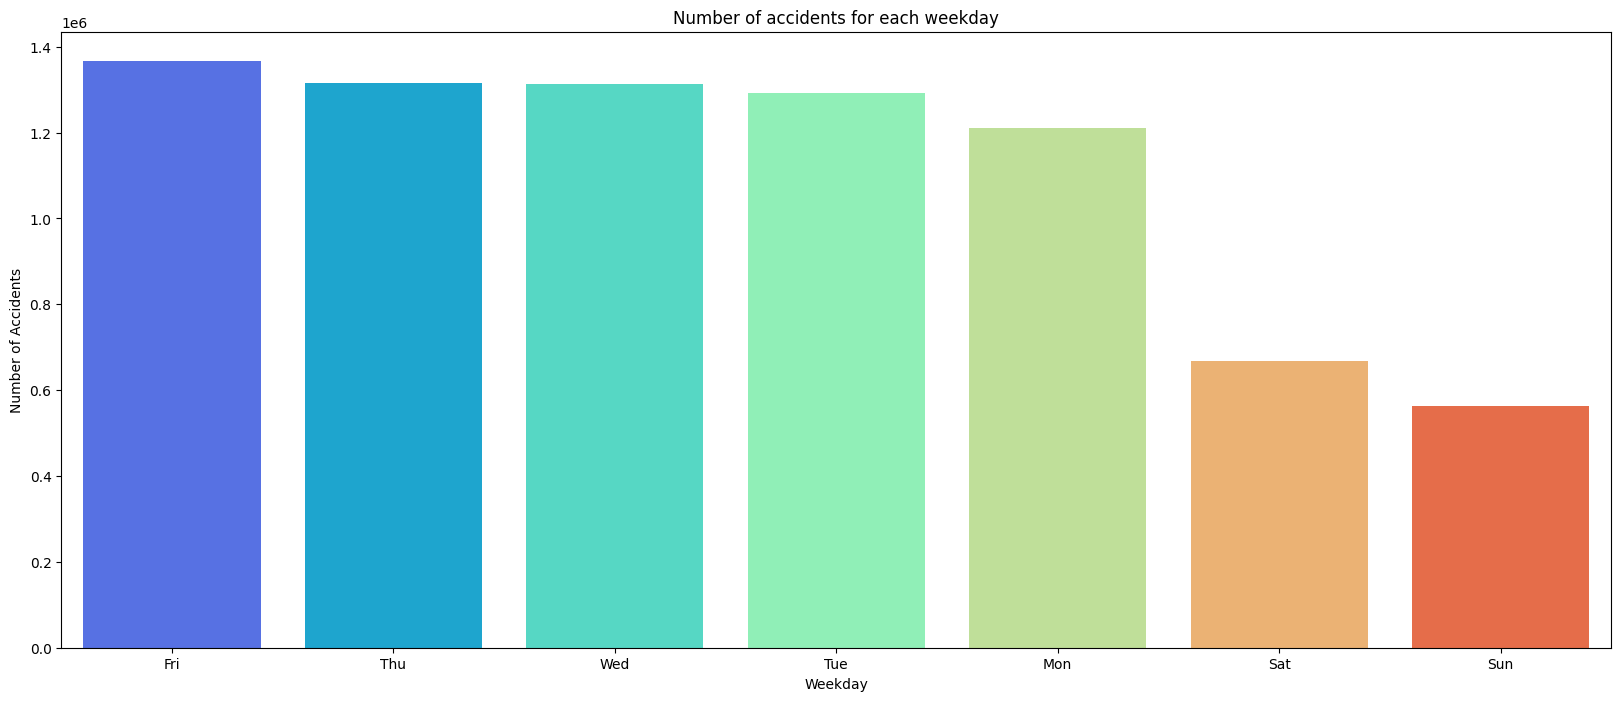

In [24]:
plt.figure(figsize=(20, 8))
plt.title("Number of accidents for each weekday")
sns.barplot(x=list(dc.keys()), y=list(dc.values()), palette='rainbow')
plt.xlabel("Weekday")
plt.ylabel("Number of Accidents")
plt.savefig('Accidents_Weekday_Distribution.png', bbox_inches='tight', dpi=600)
plt.show()

### Top 15 frequent weather conditions

In [25]:
wthr_counts = df1['Weather_Condition'].value_counts()[:15]

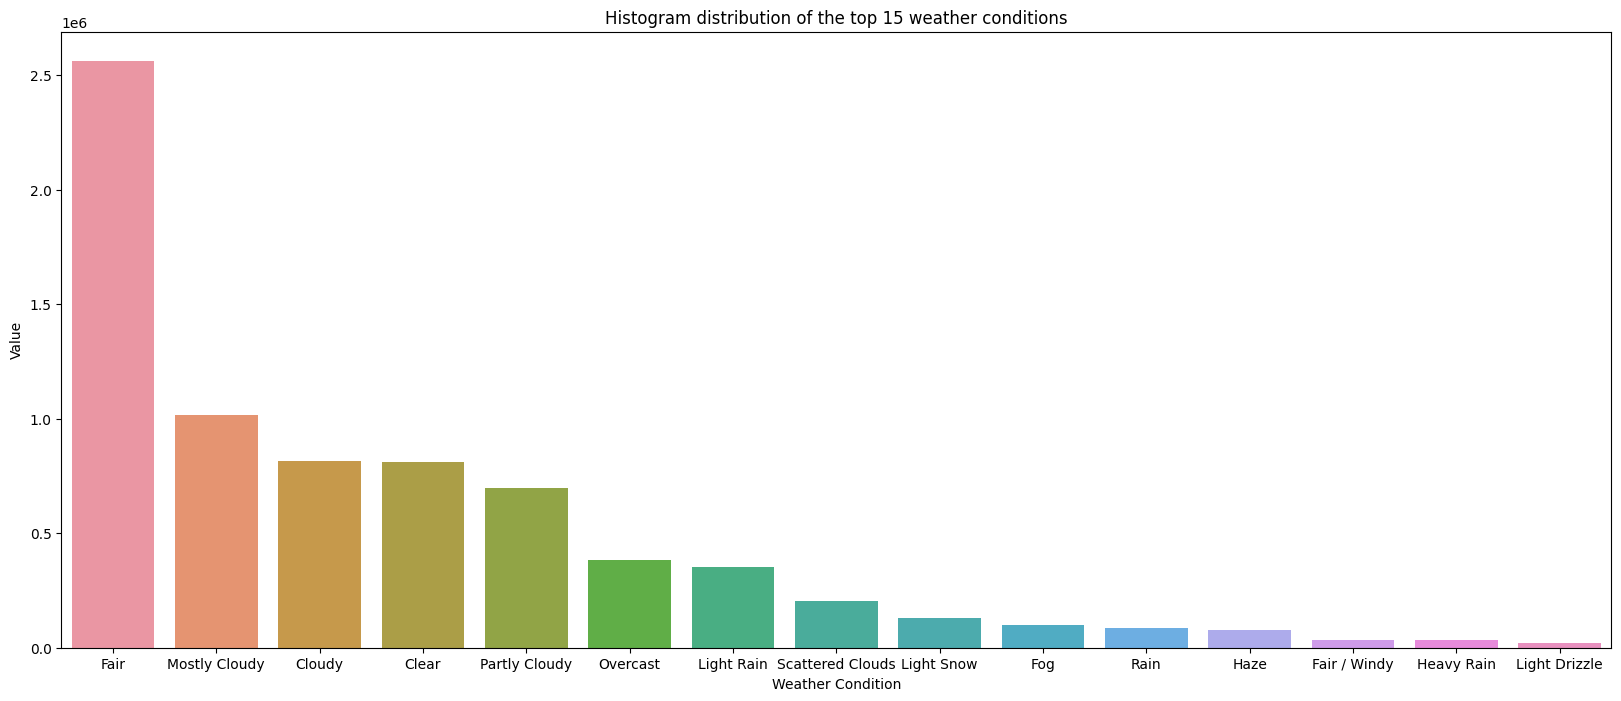

In [26]:
plt.figure(figsize=(20, 8))
plt.title("Histogram distribution of the top 15 weather conditions")
sns.barplot(x=wthr_counts.index, y=wthr_counts.values)
sns.barplot(x = wthr_counts.index,y= wthr_counts.values)
plt.xlabel("Weather Condition")
plt.ylabel("Value")
plt.savefig('Weather_Accident_Distribution.png', bbox_inches='tight', dpi=600)
plt.show()

### Count of Accidents on basis of different levels of severity

Axes(0.125,0.11;0.775x0.77)


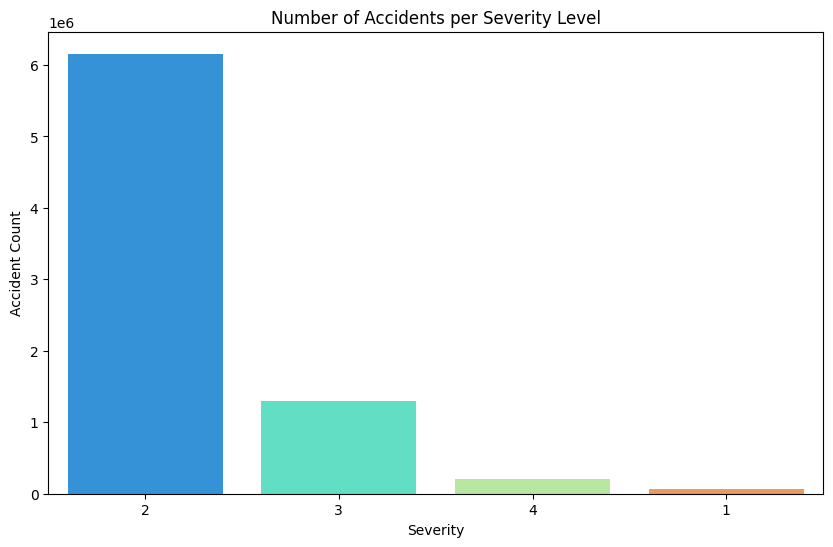

In [27]:
fig, axs = plt.subplots(figsize=(10, 6))
print(axs)
sns.countplot(x=df1['Severity'], ax=axs, order=df1['Severity'].value_counts().index, palette='rainbow')
axs.tick_params(axis='x', rotation=0)
axs.set_ylabel("Accident Count")
plt.title("Number of Accidents per Severity Level")
plt.savefig("Num_Accidents_Per_Severity_Level.png",bbox_inches = 'tight', dpi = 600)
plt.show()

### Correlations of Target variable 'Severity' with other variables

In [28]:
Severity_corr = df1.corr(numeric_only=True)['Severity']
Severity_corr.drop('Severity', inplace=True)
Severity_corr

Start_Lat              0.069060
Start_Lng              0.052862
End_Lat                0.083724
End_Lng                0.093190
Distance(mi)           0.034787
Temperature(F)        -0.020327
Wind_Chill(F)         -0.070039
Humidity(%)            0.022293
Pressure(in)           0.042347
Visibility(mi)        -0.003473
Wind_Speed(mph)        0.040214
Precipitation(in)      0.021080
Amenity               -0.032875
Bump                  -0.005158
Crossing              -0.108323
Give_Way              -0.004785
Junction               0.049890
No_Exit               -0.010352
Railway               -0.010303
Roundabout            -0.001678
Station               -0.046032
Stop                  -0.047106
Traffic_Calming       -0.005502
Traffic_Signal        -0.104901
Turning_Loop                NaN
Year                  -0.247046
Month                 -0.010507
Day                    0.000326
Weekday               -0.004445
Hour                   0.012661
Time Duration (min)    0.001063
Name: Se

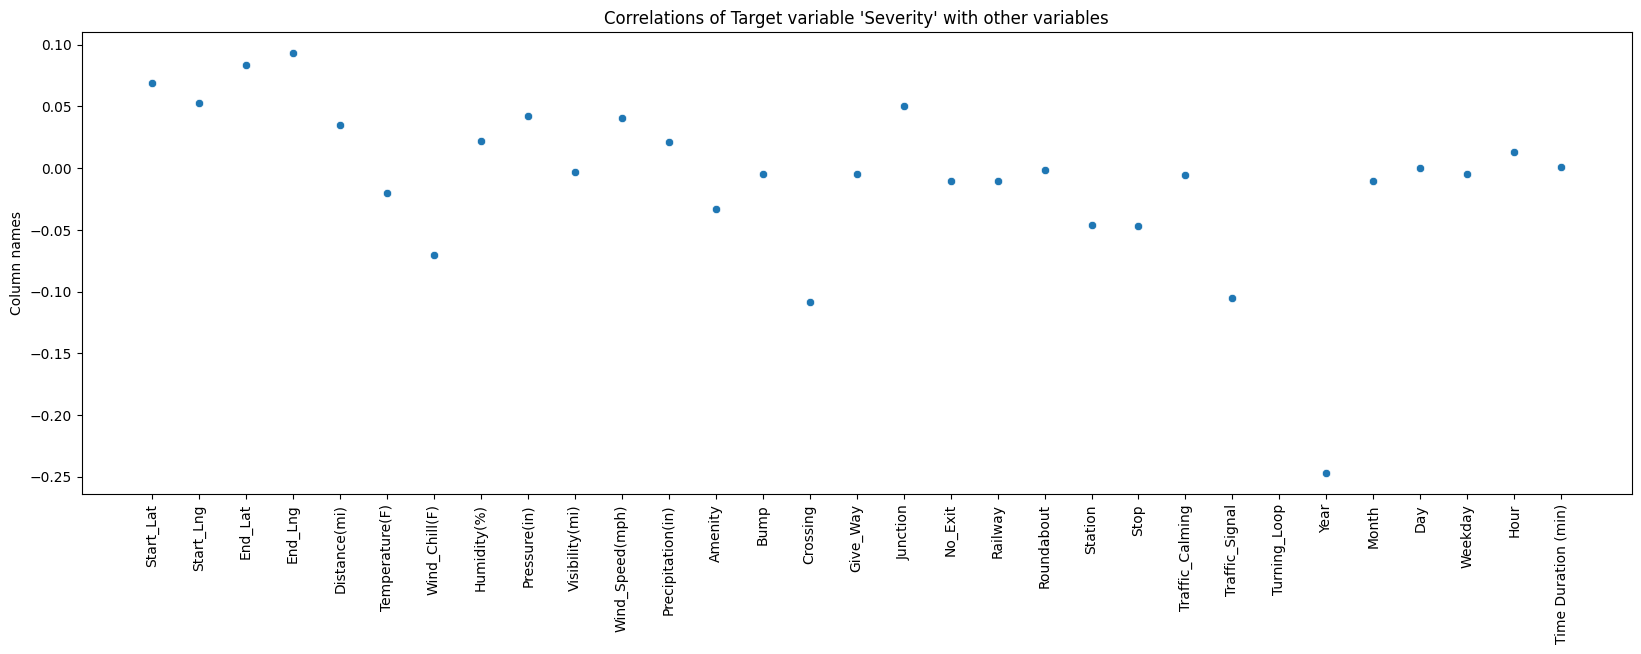

In [29]:
fig, axs = plt.subplots(figsize=(20, 6))
sns.scatterplot(x=Severity_corr.index, y=Severity_corr.values)
axs.tick_params(axis='x', rotation=90)
axs.set_ylabel("Column names")
plt.title("Correlations of Target variable 'Severity' with other variables")
plt.savefig("Correlations_with_severity.png",bbox_inches = 'tight', dpi = 600)
plt.show()

### Count of Accidents on basis of Different sources

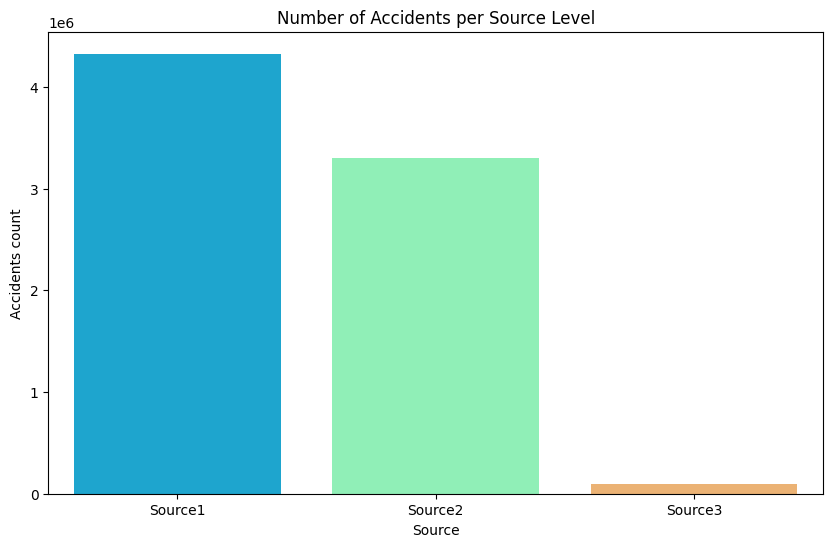

In [30]:
fig, axs = plt.subplots(figsize=(10, 6))
sns.countplot(x=df1['Source'], ax=axs, order=df1['Source'].value_counts().index, palette='rainbow')
axs.tick_params(axis='x', rotation=0)
axs.set_ylabel('Accidents count')
plt.title("Number of Accidents per Source Level")
plt.savefig("Accidents_Per_Source_Level.png",bbox_inches = 'tight', dpi = 600)
plt.show()

### Year-wise Accident trend

In [31]:
yr_wise_trend = pd.DataFrame(df1['Year'].value_counts())
yr_wise_trend.columns = ['Cases']
yr_wise_trend

,Cases
Year,
2022,1762452
2021,1563753
2020,1178913
2019,954303
2018,893426
2017,718093
2016,410821
2023,246633


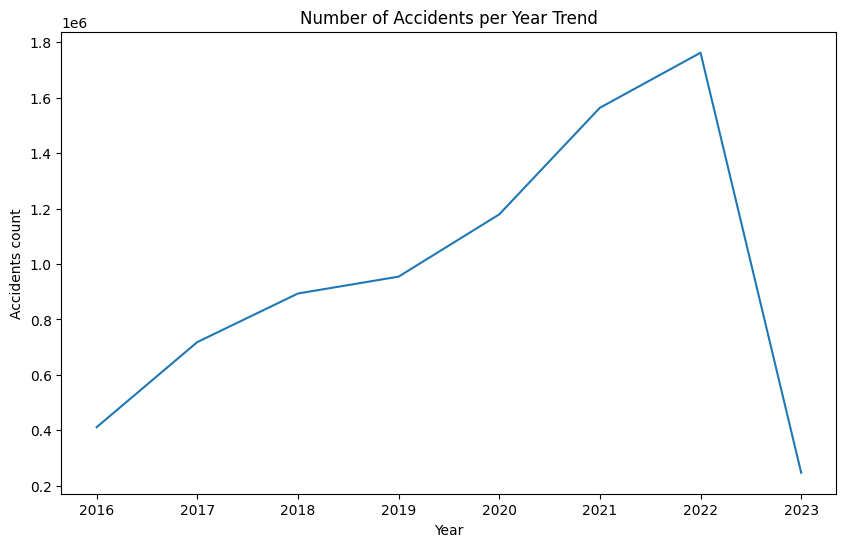

In [33]:
fig, axs = plt.subplots(figsize=(10, 6))
sns.lineplot(x=yr_wise_trend.index, y=yr_wise_trend['Cases'])
axs.tick_params(axis='x', rotation=0)
axs.set_ylabel('Accidents count')
plt.title("Number of Accidents per Year Trend")
plt.savefig("Year_wise_accident_trend.png",bbox_inches = 'tight', dpi = 600)
plt.show()

### Count of Accidents on basis of Different Timezones

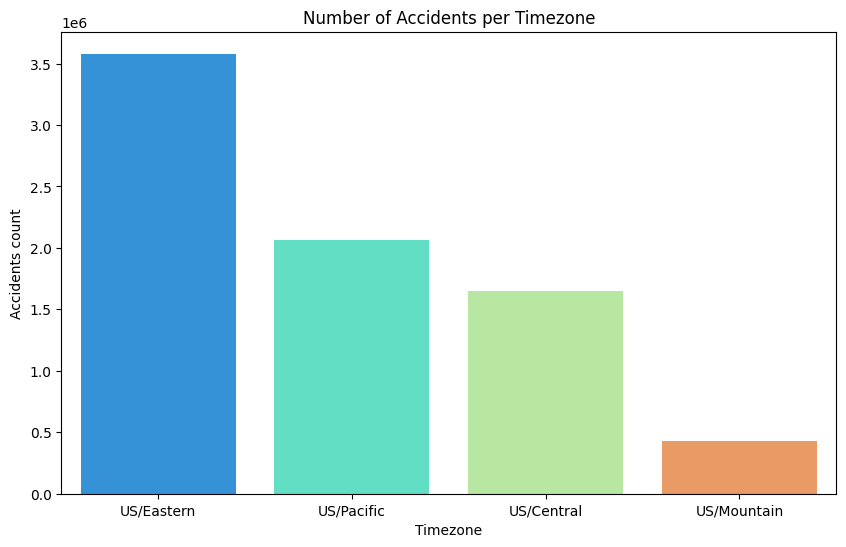

In [34]:
fig, axs = plt.subplots(figsize=(10, 6))
sns.countplot(x=df1['Timezone'], ax=axs, order=df1['Timezone'].value_counts().index, palette='rainbow')
axs.tick_params(axis='x', rotation=0)
axs.set_ylabel('Accidents count')
plt.title("Number of Accidents per Timezone")
plt.savefig("Accidents_Per_Timezone.png",bbox_inches = 'tight', dpi = 600)
plt.show()

### Count of Accidents on basis of Different Months and Years

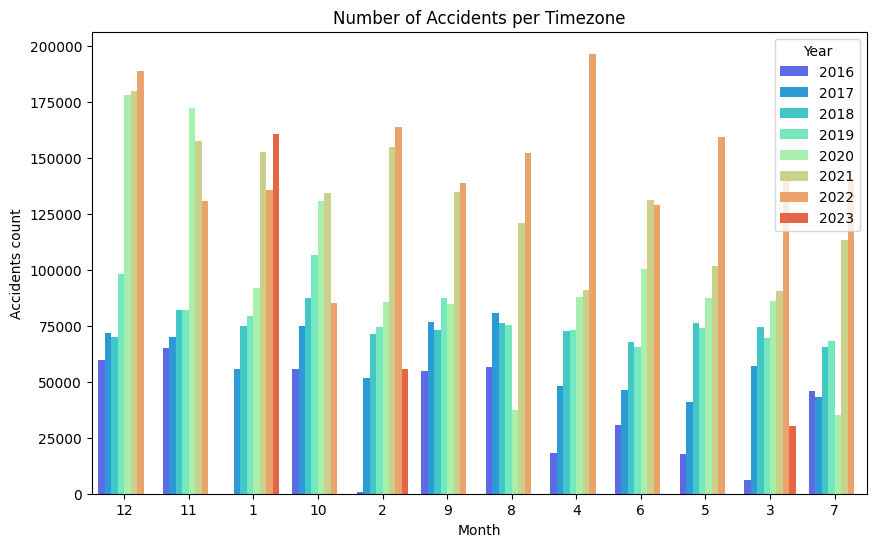

In [35]:
fig, axs = plt.subplots(figsize=(10, 6))
sns.countplot(x=df1['Month'], ax=axs, order=df1['Month'].value_counts().index, palette='rainbow', hue=df1['Year'])
axs.tick_params(axis='x', rotation=0)
axs.set_ylabel('Accidents count')
plt.title("Number of Accidents per Timezone")
plt.savefig("Accidents_Per_Timezone.png",bbox_inches = 'tight', dpi = 600)
plt.show()

### Count of Accidents on basis of Bump exists or not

In [ ]:
100*df1['Bump'].value_counts()/df1.shape[0]

Bump
False    99.954531
True      0.045469
Name: count, dtype: float64

### Count of Accidents on basis of Amenity exists or not

In [ ]:
100*df1['Amenity'].value_counts()/df1.shape[0]

Amenity
False    98.753506
True      1.246494
Name: count, dtype: float64

### Count of Accidents on basis of Crossing exists or not

In [ ]:
100*df1['Crossing'].value_counts()/df1.shape[0]

Crossing
False    88.694119
True     11.305881
Name: count, dtype: float64

In [ ]:
Crossing_accident_count = pd.DataFrame(df1['Crossing'].value_counts())
Crossing_accident_count.columns = ['Cases']
Crossing_accident_count

,Cases
Crossing,
False,6854631
True,873763


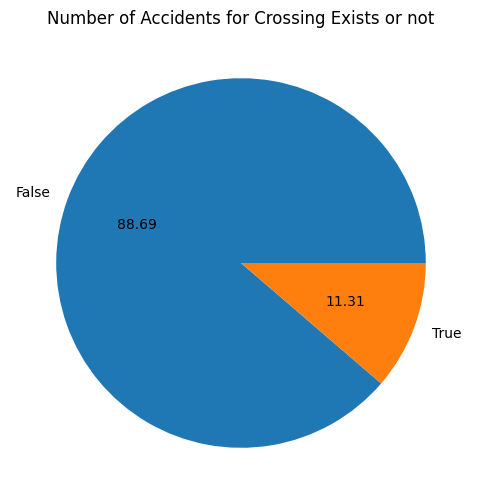

In [ ]:
fig, axs = plt.subplots(figsize=(10, 6))
plt.pie(Crossing_accident_count['Cases'], labels=Crossing_accident_count.index, autopct='%1.2f')
plt.title("Number of Accidents for Crossing Exists or not")
plt.savefig("Accidents_Per_Crossing.png",bbox_inches = 'tight', dpi = 600)
plt.show()

## Exporting EDA dataset with converted data types

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 52 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Lat              float64       
 4   Start_Lng              float64       
 5   End_Lat                float64       
 6   End_Lng                float64       
 7   Distance(mi)           float64       
 8   Description            object        
 9   Street                 object        
 10  City                   object        
 11  County                 object        
 12  State                  object        
 13  Zipcode                object        
 14  Country                object        
 15  Timezone               object        
 16  Airport_Code           object        
 17  Weather_Timestamp      datetime64[ns]
 18  Temperature(F)        

In [ ]:
df1.to_csv('EDA_output.csv', index=False)

In [ ]:
# del df1